# EDA - Glassdoor Reviews

### Imports

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA Full Dataset

### Load the Dataset

In [124]:
#Load the data
reviews = pd.read_csv('glassdoor_reviews.csv')
reviews.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


### Dataset Overview

In [125]:
print("Dataset Shape (rows, columns):", reviews.shape)
print("\nColumns and Data Types:")
print(reviews.dtypes)

Dataset Shape (rows, columns): (838566, 18)

Columns and Data Types:
firm                    object
date_review             object
job_title               object
current                 object
location                object
overall_rating           int64
work_life_balance      float64
culture_values         float64
diversity_inclusion    float64
career_opp             float64
comp_benefits          float64
senior_mgmt            float64
recommend               object
ceo_approv              object
outlook                 object
headline                object
pros                    object
cons                    object
dtype: object


In [126]:
reviews['date_review'] = pd.to_datetime(reviews['date_review'])

### Descriptive statistics for Numeric Columns

In [127]:
print("\nDescriptive Statistics for Numeric Columns:")
print(reviews.describe())


Descriptive Statistics for Numeric Columns:
                         date_review  overall_rating  work_life_balance  \
count                         838566   838566.000000      688672.000000   
mean   2018-01-30 15:03:19.703779584        3.655956           3.375735   
min              2008-01-31 00:00:00        1.000000           1.000000   
25%              2016-04-01 00:00:00        3.000000           2.000000   
50%              2018-08-22 00:00:00        4.000000           4.000000   
75%              2020-09-12 00:00:00        5.000000           4.000000   
max              2021-06-08 00:00:00        5.000000           5.000000   
std                              NaN        1.174684           1.305874   

       culture_values  diversity_inclusion     career_opp  comp_benefits  \
count   647193.000000        136066.000000  691065.000000  688484.000000   
mean         3.590164             3.966612       3.461825       3.398109   
min          1.000000             1.000000       1.

### Descriptive Statistics for Non-Numeric Columns

In [128]:
print("\nDescriptive Statistics for Non-Numeric Columns:")
print(reviews.describe(include='object'))


Descriptive Statistics for Non-Numeric Columns:
          firm            job_title           current  \
count   838566               838566            838566   
unique     428                62275                29   
top        IBM   Anonymous Employee  Current Employee   
freq     60436               162649            209599   

                        location recommend ceo_approv outlook headline  \
count                     541223    838566     838566  838566   835976   
unique                     14486         3          4       4   390454   
top     London, England, England         v          o       v     Good   
freq                       58665    427865     311433  301413    14300   

                             pros                      cons  
count                      838564                    838553  
unique                     778559                    777133  
top     Great company to work for  None that I can think of  
freq                          720             

### Analyzing Missing Values

In [ ]:
# Calculate missing values and percentage
missing_values = reviews.isnull().sum()
total_entries = len(reviews)
missing_percentage = (missing_values / total_entries) * 100

# Combine into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})

print("\nMissing Values Summary:")
print(missing_summary)



Missing Values Summary:
                     Missing Values  Percentage (%)
firm                              0            0.00
date_review                       0            0.00
job_title                         0            0.00
current                           0            0.00
location                     297343           35.46
overall_rating                    0            0.00
work_life_balance            149894           17.88
culture_values               191373           22.82
diversity_inclusion          702500           83.77
career_opp                   147501           17.59
comp_benefits                150082           17.90
senior_mgmt                  155876           18.59
recommend                         0            0.00
ceo_approv                        0            0.00
outlook                           0            0.00
headline                       2590            0.31
pros                              2            0.00
cons                             13    

Text(0.5, 1.0, 'Missing Values Heatmap')

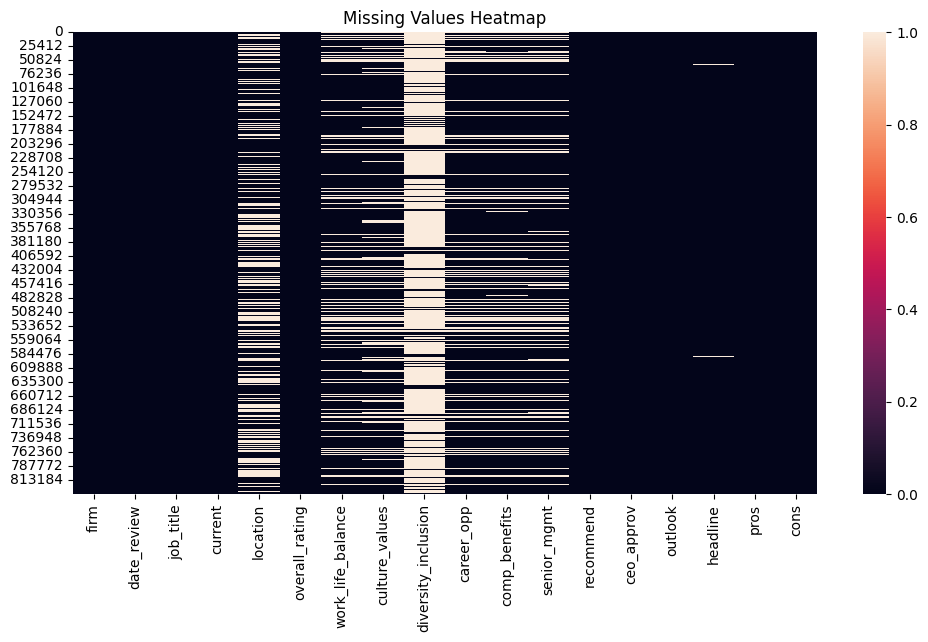

In [130]:
plt.figure(figsize=(12, 6))
sns.heatmap(reviews.isnull(), cbar=True)
plt.title('Missing Values Heatmap')

### Analyzing Duplicates

In [131]:
print("Total duplicate rows:", reviews.duplicated().sum())
duplicated_reviews = reviews[reviews.duplicated(keep=False)]
duplicates =  reviews.duplicated().sum()
duplicated_percentage = (duplicates / total_entries) * 100
print("\nPercentage of Duplicates:")
print(duplicated_percentage)

Total duplicate rows: 33515

Percentage of Duplicates:
3.9967038968906445


In [132]:
duplicated_reviews.head(2)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
1231,ASDA,2010-10-29,Asda Manager,Former Employee,NaN,5,5.0,NaN,NaN,5.0,5.0,4.0,v,o,o,bil,"great team work, working together",long hours long shift patterns
1232,ASDA,2010-10-29,Asda Manager,Former Employee,NaN,5,5.0,NaN,NaN,5.0,5.0,4.0,v,o,o,bil,"great team work, working together",long hours long shift patterns


Dropping duplicated rows

In [133]:
reviews = reviews.drop_duplicates()

### Most common firms

In [134]:
top_firms = reviews['firm'].value_counts().head(10)
print(top_firms)

firm
IBM           49293
McDonald-s    49190
Deloitte      42909
EY            32217
PwC           32115
Oracle        28094
Microsoft     26675
J-P-Morgan    25183
KPMG          22391
Apple         20308
Name: count, dtype: int64


### Locations

In [135]:
unique_locations = reviews['location'].nunique()
print("Number of unique locations:", unique_locations)

Number of unique locations: 14486


Unique locations per company

In [136]:
locations_per_company = reviews.groupby("firm")["location"].nunique().sort_values(ascending=True)
print(locations_per_company)

firm
Office-of-Rail-Regulation                  1
NPSA                                       1
UKCIL                                      1
National-Offender-Management-Service       2
AlixPartners                               2
                                        ... 
Apple                                   1176
Marriott-International                  1223
IBM                                     1477
Pizza-Hut                               2164
McDonald-s                              6952
Name: location, Length: 428, dtype: int64


In [137]:
top_locations = reviews['location'].value_counts().head(10)
print(top_locations)

location
London, England, England     57341
New York, NY                 30090
Bangalore                    25672
Hyderābād                    10603
Mumbai                        9120
Gurgaon, Haryana, Haryana     8059
Chicago, IL                   7512
Singapore                     7266
San Francisco, CA             7046
Dublin, Dublin                6997
Name: count, dtype: int64


In [138]:
#Most common locations within England
england_reviews = reviews[reviews['location'].str.contains('England', na=False)]
england_locations = england_reviews['location'].value_counts().head(10)
print("\nMost Common Locations within England:")
print(england_locations)


Most Common Locations within England:
location
London, England, England                        57341
Manchester, England, England                     5539
Birmingham, England, England                     4076
Leeds, England, England                          3255
Bristol, England, England                        2581
Cambridge, East of England, England, England     1752
Newcastle upon Tyne, England, England            1696
Liverpool, England, England                      1614
Reading, England, England                        1534
Nottingham, England, England                     1517
Name: count, dtype: int64


In [139]:
# Most common firms with location = London
london_reviews = reviews[reviews['location'].str.contains('London', na=False)]
london_top_firms = london_reviews['firm'].value_counts().head(10)

print("Top 10 firms with location in London:")
print(london_top_firms)

Top 10 firms with location in London:
firm
Accenture        1852
Barclays         1815
Deloitte         1662
EY               1633
PwC              1621
KPMG             1222
HSBC-Holdings    1165
Tesco            1027
NHS               966
McDonald-s        938
Name: count, dtype: int64


### Correlation Analysis

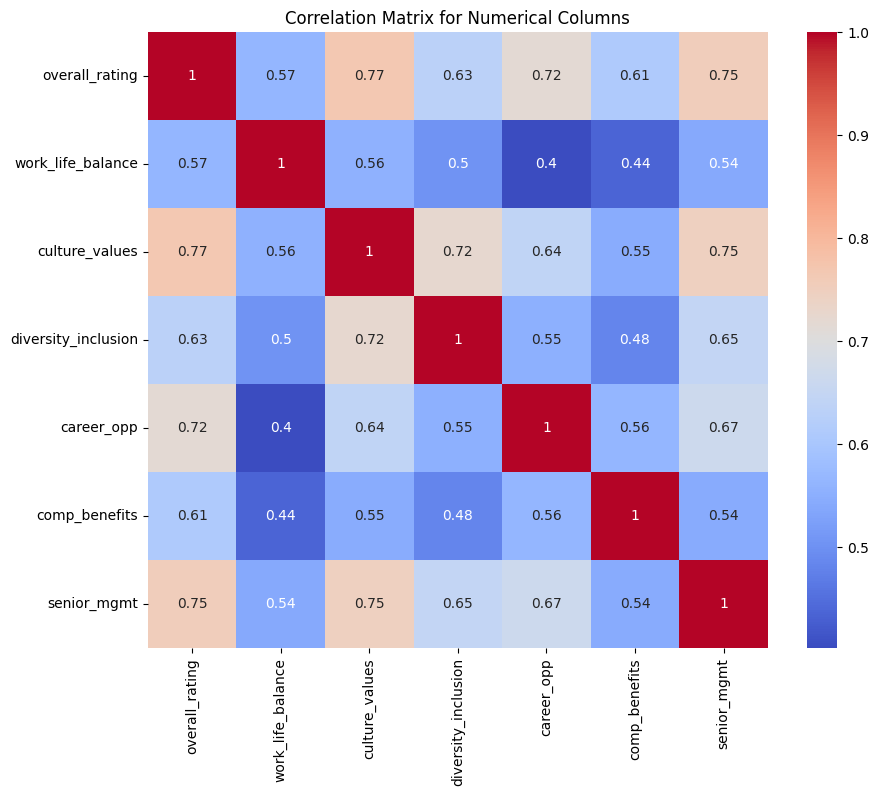

In [140]:
# Select only numerical columns from the DataFrame
numerical_data = reviews.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

## 2. EDA Filtered Dataset

To create a more recent dataset and focus on one english speaking country we refine the data set to reviews for companies in England after 2015

In [141]:
#Filter for reviews where location contains "England" 
england_reviews = reviews[reviews['location'].str.contains('England', na=False)]

In [142]:
# Filter for reviews between the years 2015 and 2025 (inclusive)
england_recent = england_reviews[(england_reviews['date_review'] >= '2015-01-01') & (england_reviews['date_review'] <= '2025-12-31')].copy()

england_recent.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
6,AFH-Wealth-Management,2016-09-23,IFA,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,r,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...
13,AFH-Wealth-Management,2017-05-21,Administrative Support,"Former Employee, more than 5 years","Birmingham, England, England",1,4.0,1.0,NaN,2.0,4.0,1.0,o,v,v,Administration team,Free parking . Meet some nice people in the te...,Not treated at all well after 6 yrs of being a...


In [143]:
# Count how many reviews meet both criteria
count_reviews = england_recent.shape[0]
# Print the count
print(f"Number of reviews from England between 2015 and 2025: {count_reviews}")

Number of reviews from England between 2015 and 2025: 125341



Number of Reviews by Year (England Reviews):
year
2015     7629
2016    10806
2017    13033
2018    12512
2019    18554
2020    32569
2021    30238
Name: count, dtype: int64


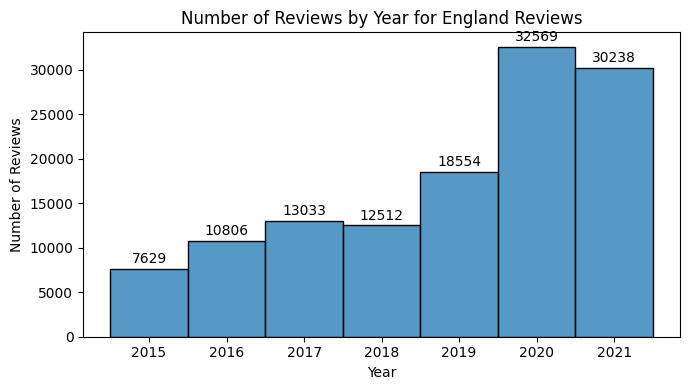

In [ ]:
# Extract year from the date_review column (if not already done)
england_recent['year'] = england_recent['date_review'].dt.year

# Count number of reviews per year
reviews_per_year = england_recent['year'].value_counts().sort_index()
print("\nNumber of Reviews by Year (England Reviews):")
print(reviews_per_year)

# Convert to DataFrame if you want to save or display as a table
reviews_per_year_df = reviews_per_year.reset_index()
reviews_per_year_df.columns = ['Year', 'Number_of_Reviews']

# Plot the histogram with annotated counts
plt.figure(figsize=(7, 4))
ax = sns.histplot(data=england_recent, x='year', 
                  bins=range(england_recent['year'].min(), england_recent['year'].max() + 2), 
                  discrete=True)

# Annotate bar heights with review counts
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Year for England Reviews")
plt.tight_layout()
plt.show()


### Most common firms with location containing England and date_review between 2015-2025

In [150]:
top_firms_recent = england_recent['firm'].value_counts().head(10)
print(top_firms_recent)

firm
Tesco                5116
McDonald-s           3314
NHS                  2881
J-Sainsbury          2872
Barclays             2345
ASDA                 2164
Marks-and-Spencer    2078
Primark              1880
Waitrose             1841
PwC                  1810
Name: count, dtype: int64


In [151]:
unique_companies = england_recent['firm'].nunique()
print("Number of unique companies:", unique_companies)

Number of unique companies: 416


In [152]:
england_recent.to_csv('england_recent.csv', index=False)

In [153]:
print("Top 10 locations within England:")
print(england_locations.head(10))

Top 10 locations within England:
location
London, England, England                        57341
Manchester, England, England                     5539
Birmingham, England, England                     4076
Leeds, England, England                          3255
Bristol, England, England                        2581
Cambridge, East of England, England, England     1752
Newcastle upon Tyne, England, England            1696
Liverpool, England, England                      1614
Reading, England, England                        1534
Nottingham, England, England                     1517
Name: count, dtype: int64


### Filtering out non corporate companies
Given the goals of the project, filtering the data set further to remove reviews of non corporate companies (retail, hospitality, service)

In [154]:
england_recent['firm'] = england_recent['firm'].str.replace('-', ' ')
# Load the suggestion list
suggestion_df = pd.read_csv("Refined_Industry_and_Suggestion_List.csv")

# Filter for rows where suggestion is "remove"
firms_to_remove = suggestion_df[suggestion_df["suggestion"] == "remove"]["firm"].dropna().unique()

# Filter the main DataFrame
england_recent = england_recent[~england_recent["firm"].isin(firms_to_remove)]


england_recent.to_csv('filtered_england_recent.csv')

In [155]:
# Count how many reviews meet both criteria
count_reviews = england_recent.shape[0]
# Print the count
print(f"Final number of reviews from England between 2015 and 2025: {count_reviews}")

Final number of reviews from England between 2015 and 2025: 76126
